# Credit Card Customer Segmentation

# Introduction

In this project, we play the role of a data scientist working for a credit card company. Our objective is to segment the company's customers into distinct groups using the K-means clustering algorithm. This segmentation will help the company apply tailored business strategies for each group, such as providing higher credit limits for frequent card users with low spending or creating incentives for high-income customers who do not use the card as much.

The dataset provided contains information on the company's clients, including demographic details, spending behavior, and credit card usage. We will follow these steps to achieve our goal:

* Analyze the dataset.
* Prepare the data for modeling.
* Find an appropriate number of clusters.
* Segment the data.
* Interpret and explain the results.

The data dictionary for the dataset is as follows:

* `customer_id`: Unique identifier for each customer.

* `age`: Customer age in years.

* `gender`: Customer gender (M or F).

* `dependent_count`: Number of dependents of each customer.

* `education_level`: Level of education ("High School", "Graduate", etc.).

* `marital_status`: Marital status ("Single", "Married", etc.).

* `estimated_income`: The estimated income for the customer projected by the data science team.

* `months_on_book`: Time as a customer in months.

* `total_relationship_count`: Number of times the customer contacted the company.

* `months_inactive_12_mon`: Number of months the customer did not use the credit card in the last 12 months.

* `credit_limit`: Customer's credit limit.

* `total_trans_amount`: The overall amount of money spent on the card by the customer.

* `total_trans_count`: The overall number of times the customer used the card.

* `avg_utilization_ratio`: Daily average utilization ratio.

By the end of this project, we will deliver a detailed segmentation of customers and describe the characteristics and differences of each cluster, enabling the company to implement effective and targeted business strategies.







Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
customers=pd.read_csv("customer_segmentation.csv")
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [3]:
customers.shape

(10127, 14)

In [4]:
customers.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [5]:
customers.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

There are `10127` rows and `14` columns in the dataset including a unique identifier for each client, which is not going to be needed for the segmentation.

Of the `13` columns left, there are `8` columns containing `integers`, `2` containing `floats`, and `3` columns containing `strings`, which means we have `3` categorical columns to deal with.

Also, there are no missing values.

In [7]:
for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customers[col].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: gender, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



Here we can see how many unique categories are there in each categorical variable and how many datapoints per category.

As we're working with unsupervised machine learning, there isn't a target variable on which we can measure the impacts of the other variables.

But we can see the correlation between the numeric variables and their distributions.

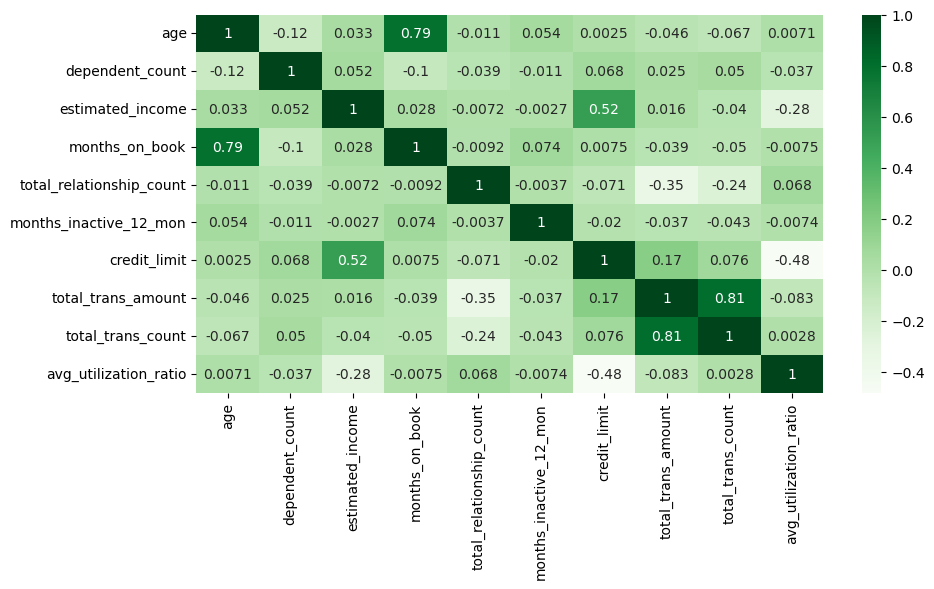

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(round(customers.drop('customer_id',axis=1),2).corr(),cmap='Greens',annot=True,ax=ax)
plt.tight_layout()
plt.show()

Most of the variables present weak correlations between each other, but there are some we can highlight:

* `age` and `months_on_book` `(0.789)`: Older customers tend to have been with the company for a longer period.

* `total_trans_amount` and `total_trans_count` `(0.807)`: Customers who make more transactions generally spend more money overall.

* `credi_limit` and `estimated_income` `(0.516)`: Customers with higher estimated incomes tend to have higher credit limits.

* `credit_limit' and `average_utilization_ratio` `(-0.483)`: Customers with higher credit limits usually have lower utilization ratios.

* `total_relationship_count` and `total_transaction_amount` `(-0.347)`: Customers who contact the company more often tend to spend less overall.

Plotting the distribution of each numeric column and comment on the results.
    

In [9]:
numeric_columns=customers.select_dtypes(include=[np.number]).columns[1:]
numeric_columns

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

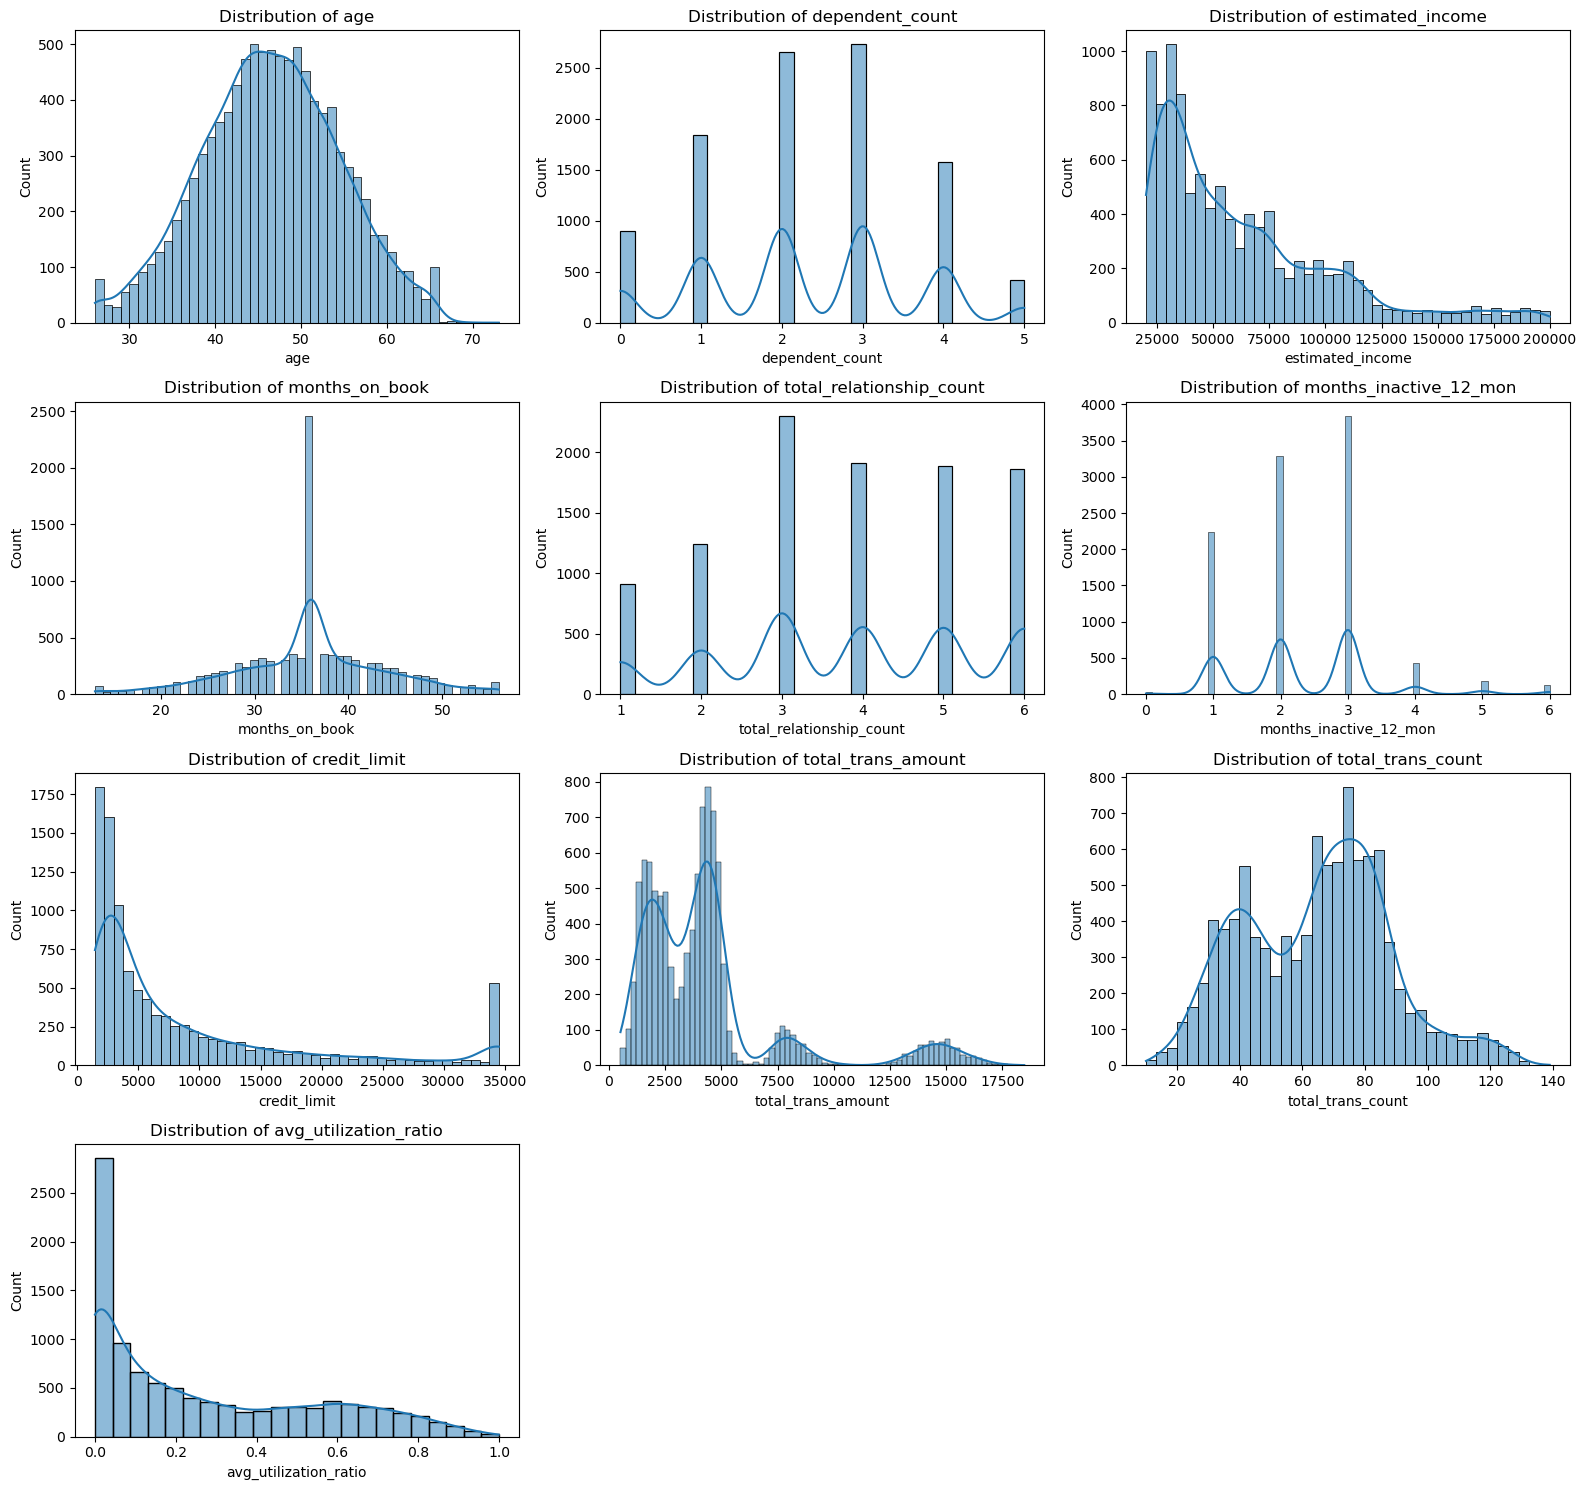

In [10]:
plt.figure(figsize=(16, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(customers[column],kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Regarding distributions, we have a couple of them closer to a normal distribution, but most of them are skewed.

Plotting the distribution of each categorical column

In [11]:
categorical_columns=['gender','education_level','marital_status']

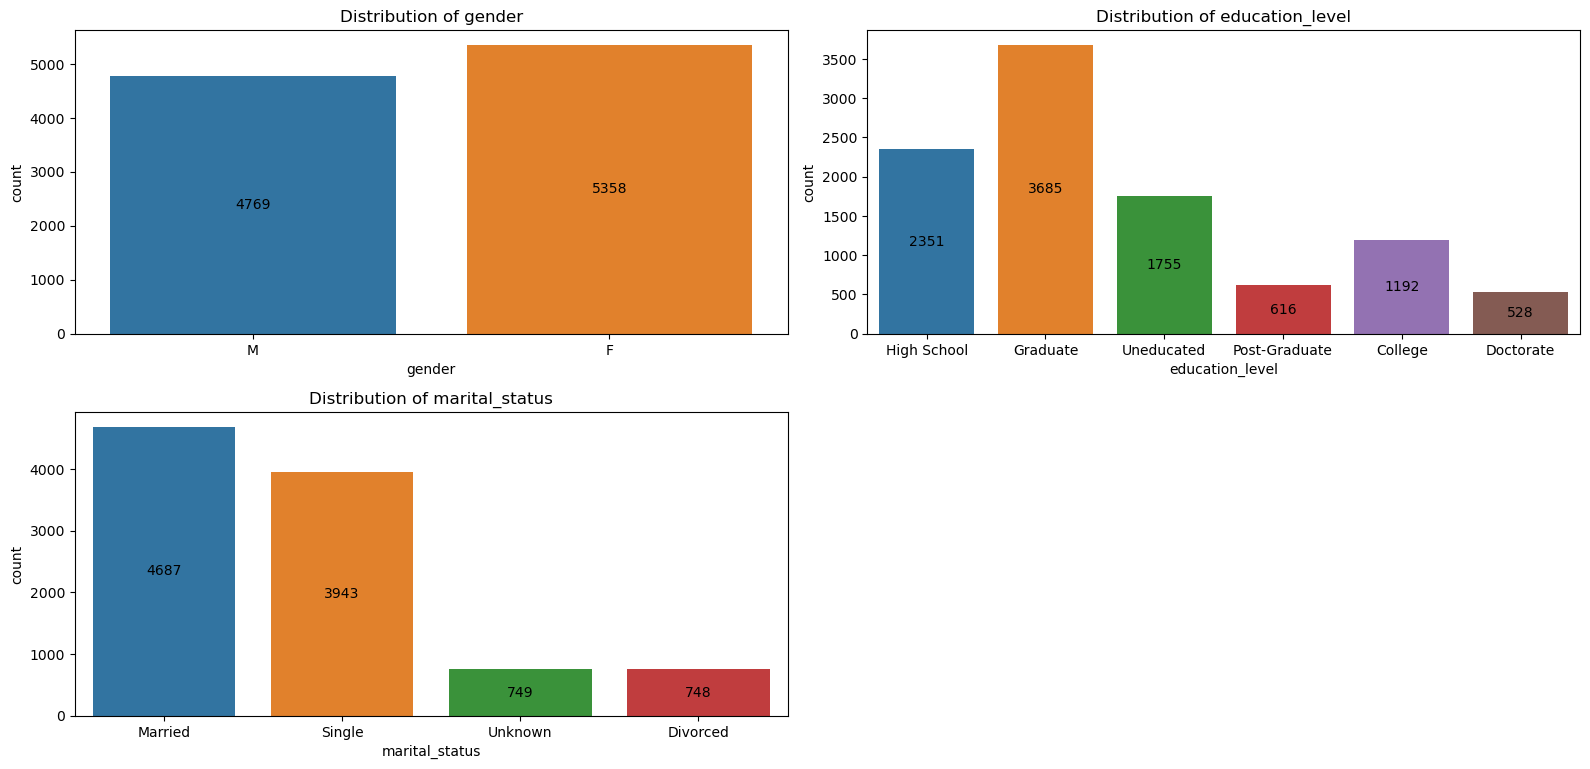

In [12]:
plt.figure(figsize=(16,15))
for i, columns in enumerate(categorical_columns):
    ax=plt.subplot(4,2,i+1)kd
    sns.countplot(x=customers[columns],ax=ax)
    ax.set_title(f"Distribution of {columns}")
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container,label_type='center')
plt.tight_layout()
plt.show()

# Feature Engineering
Let's start dealing with the categorical columns. There are three of them: `gender`, `education level`, and `marital status`.

First, let's check on the `gender` and `education_level` columns.

The `gender` column contains only `2` unique values, `"M"` and `"F"`, which means it's possible to replace all the rows with `1` and `0`.

The `education_level` column contains `6` unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.
Replace the values in the `education_level` column in the order below:
* `Uneducated` - `0`

* `High School` - `1`

* `College` - `2`

* `Graduate` - `3`

* `Post-Graduate` - `4`

* `Doctorate` - `5`

Unfortunately, we can't do the same for this marital_status column as there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others. Therefore, we'll use one-hot-encoding to create dummy variables from this column and then drop the original variable.


In [13]:
customers_modif=customers.copy()
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [14]:
customers_modif['gender']=customers_modif['gender'].apply(lambda x: 1 if x=='M' else 0)
customers_modif['gender']

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: gender, Length: 10127, dtype: int64

In [15]:
education_mapping={
    'Uneducated': 0,
    'High School':1,
    'College':2,
    'Graduate':3,
    'Post-Graduate': 4,
    'Doctorate':5}

In [16]:
customers_modif['education_level']=customers_modif['education_level'].map(education_mapping)
customers_modif['education_level']

0        1
1        3
2        3
3        1
4        0
        ..
10122    3
10123    3
10124    1
10125    3
10126    3
Name: education_level, Length: 10127, dtype: int64

In [17]:
marital_status_dummies=pd.get_dummies(customers_modif[['marital_status']],drop_first=True)
marital_status_dummies

,marital_status_Married,marital_status_Single,marital_status_Unknown
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
10122,0,1,0
10123,0,0,0
10124,1,0,0
10125,0,0,1


In [18]:
customers_modif=pd.concat([customers_modif,marital_status_dummies],axis=1)
customers_modif.drop('marital_status',axis=1,inplace=True)
customers_modif

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,1,0
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,0,0,0
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,1,0,0
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,1


# Scaling the Data
First, we need to standardize the dataset. We'll use scikit-learn's StandardScaler() for this task.

In [19]:
customers_modif_without_id=customers_modif.drop("customer_id",axis=1)
customers_modif_without_id

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,1,0
10123,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,0,0,0
10124,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,1,0,0
10125,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,1


In [20]:
scaler=StandardScaler()
scaler.fit(customers_modif_without_id)
scaled_customer=scaler.transform(customers_modif_without_id)
scaled_customer_df=pd.DataFrame(scaled_customer,columns=customers_modif_without_id.columns)
scaled_customer_df

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.928214,-0.798507,3.538459


# Choosing K

It's time to decide on the number of clusters. We'll run the k-means algorithm considering a range from 1 to 10 possible Ks and store the results. Then, we'll plot the elbow curve that will help us find a final K.

In [21]:
inertias=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit_predict(scaled_customer_df)
    inertias.append(model.inertia_)

inertias

[151905.00000000006,
 134790.6938934637,
 123153.50792430842,
 112889.8633982561,
 104078.94679135612,
 98724.48216879656,
 94452.49910879921,
 91000.72889099119,
 88400.63880465247,
 86154.57666189663]

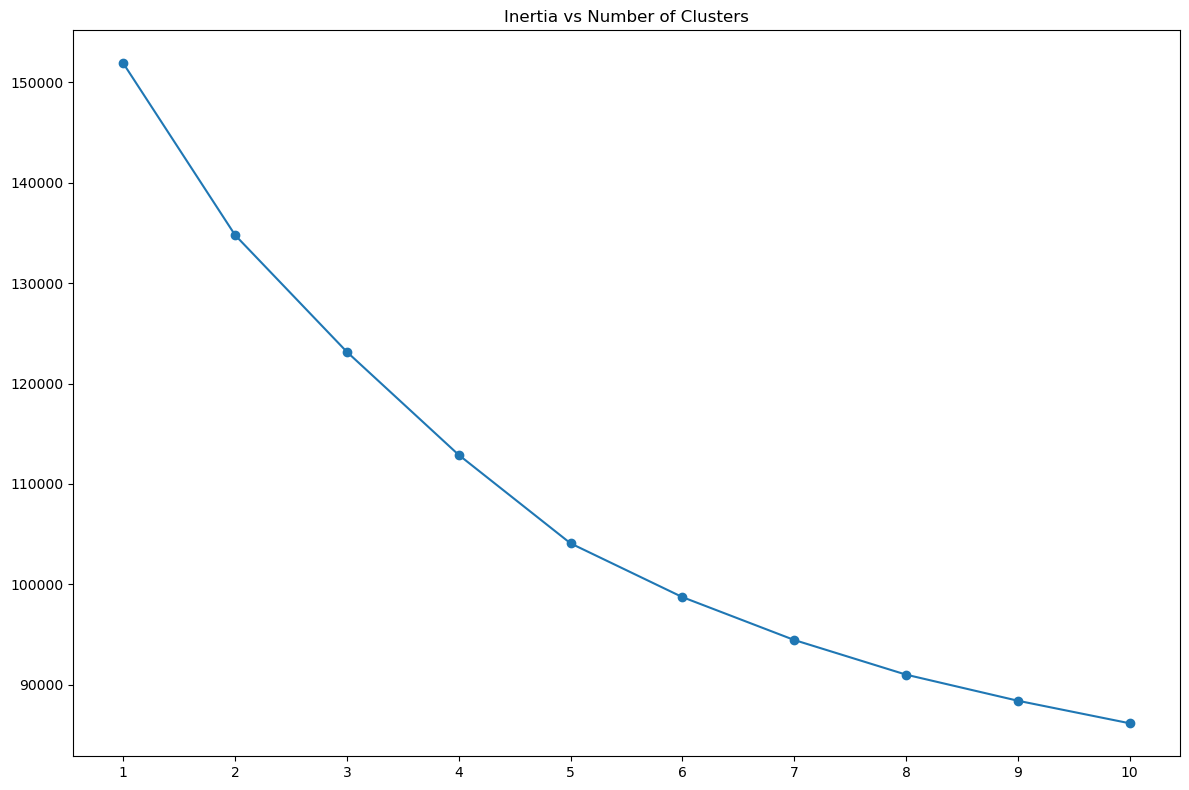

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),inertias,marker='o')
plt.xticks(ticks=range(1,11),labels=range(1,11))
plt.title("Inertia vs Number of Clusters")
plt.tight_layout()
plt.show()

It looks like the rate of decreasing of the inertia slows down between 5 and 7 clusters. We'll use 6 clusters to move on.



In [23]:
model=KMeans(n_clusters=6,random_state=42)
cluster=model.fit_predict(scaled_customer_df)
cluster

array([4, 5, 4, ..., 0, 2, 0], dtype=int32)

# Analyzing Results
Now, let's create a CLUSTER column in our original dataset so we can better understand the characteristics of each one.

In [24]:
customers['CLUSTER']=cluster + 1
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,5
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,6
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,5
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,2
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,1
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,1
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,3


In [25]:
customers['CLUSTER'].value_counts()

1    2826
6    2449
5    1771
4    1444
2     908
3     729
Name: CLUSTER, dtype: int64

We can see that cluster 1 is the largest while cluster 3 is the smallest.


Considering the numeric variable only, we'll check on the average value of each variable per cluster. We just need to group the data and plot a bar chart for each column.

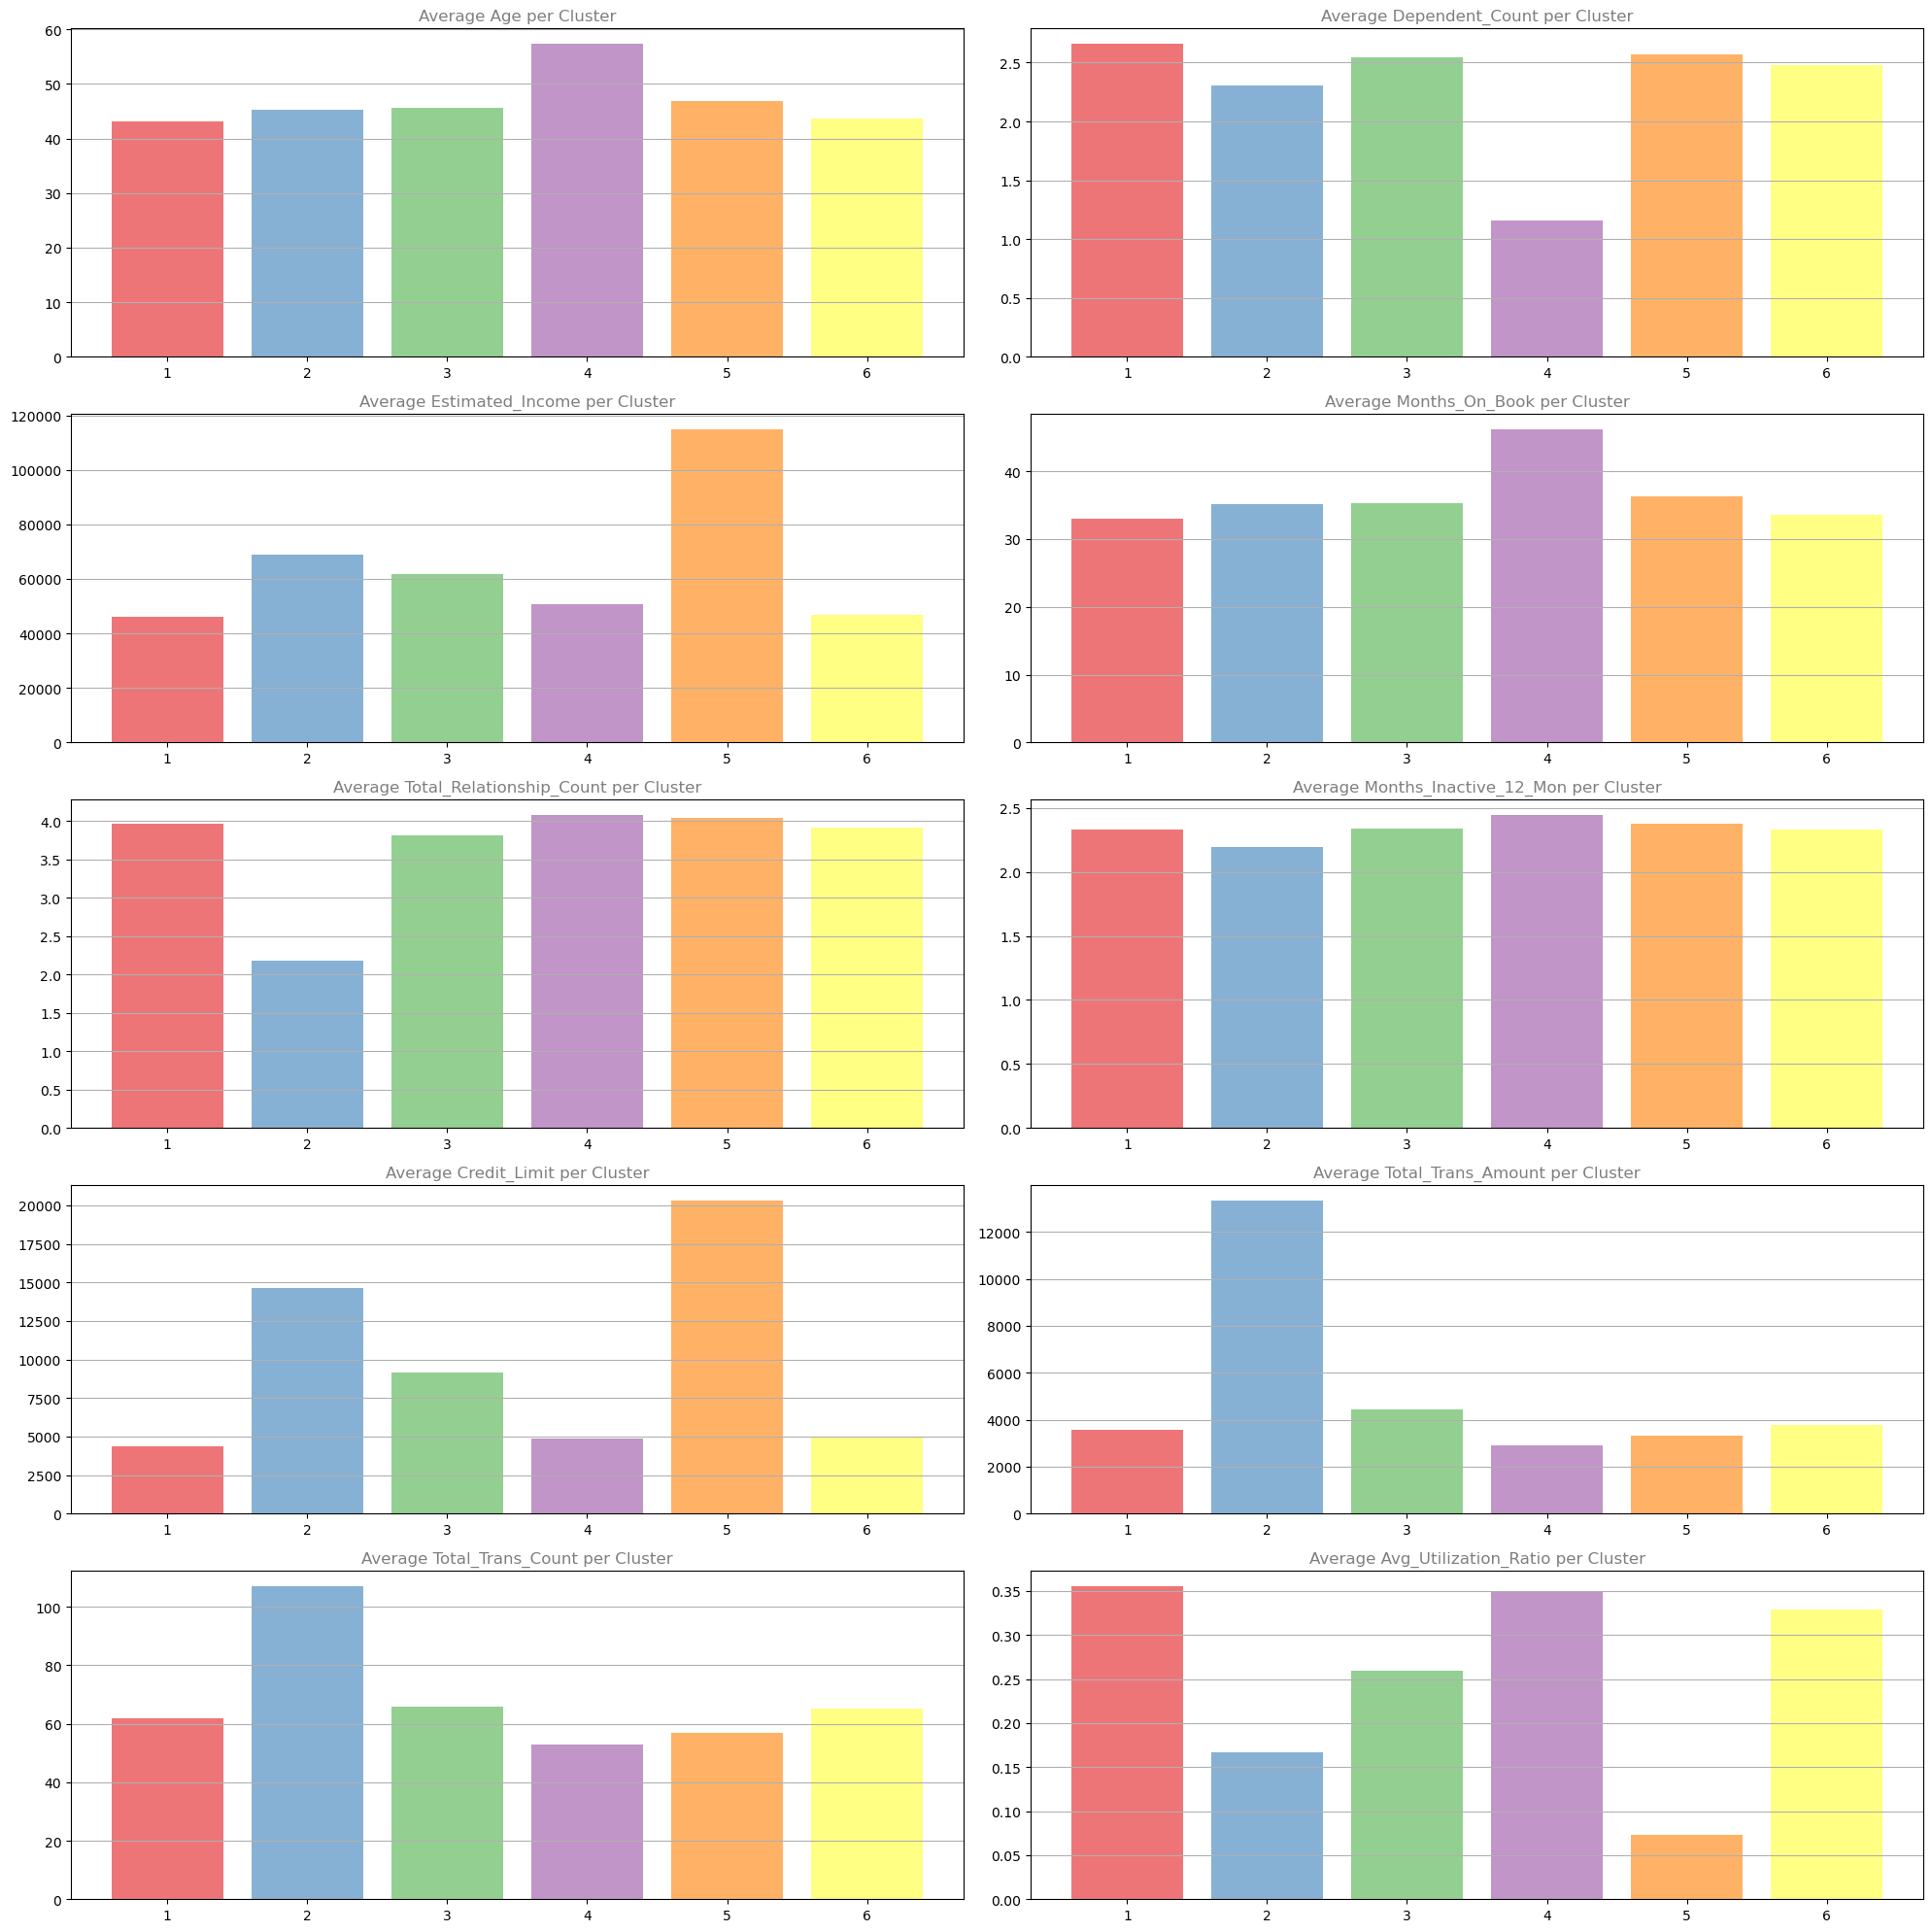

In [30]:
numeric_columns=customers.select_dtypes(include=[np.number]).drop(['customer_id','CLUSTER'],axis=1).columns

fig=plt.figure(figsize=(20,20))
for i, column in enumerate(numeric_columns):
    cluster_mean=customers.groupby('CLUSTER')[column].mean()
    ax=fig.add_subplot(5,2,i+1)
    ax.bar(cluster_mean.index,cluster_mean,color=sns.color_palette('Set1'),alpha=0.6)
    ax.set_title(f"Average {column.title()} per Cluster",alpha=0.5)
    ax.yaxis.grid(True)
    
plt.tight_layout()
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

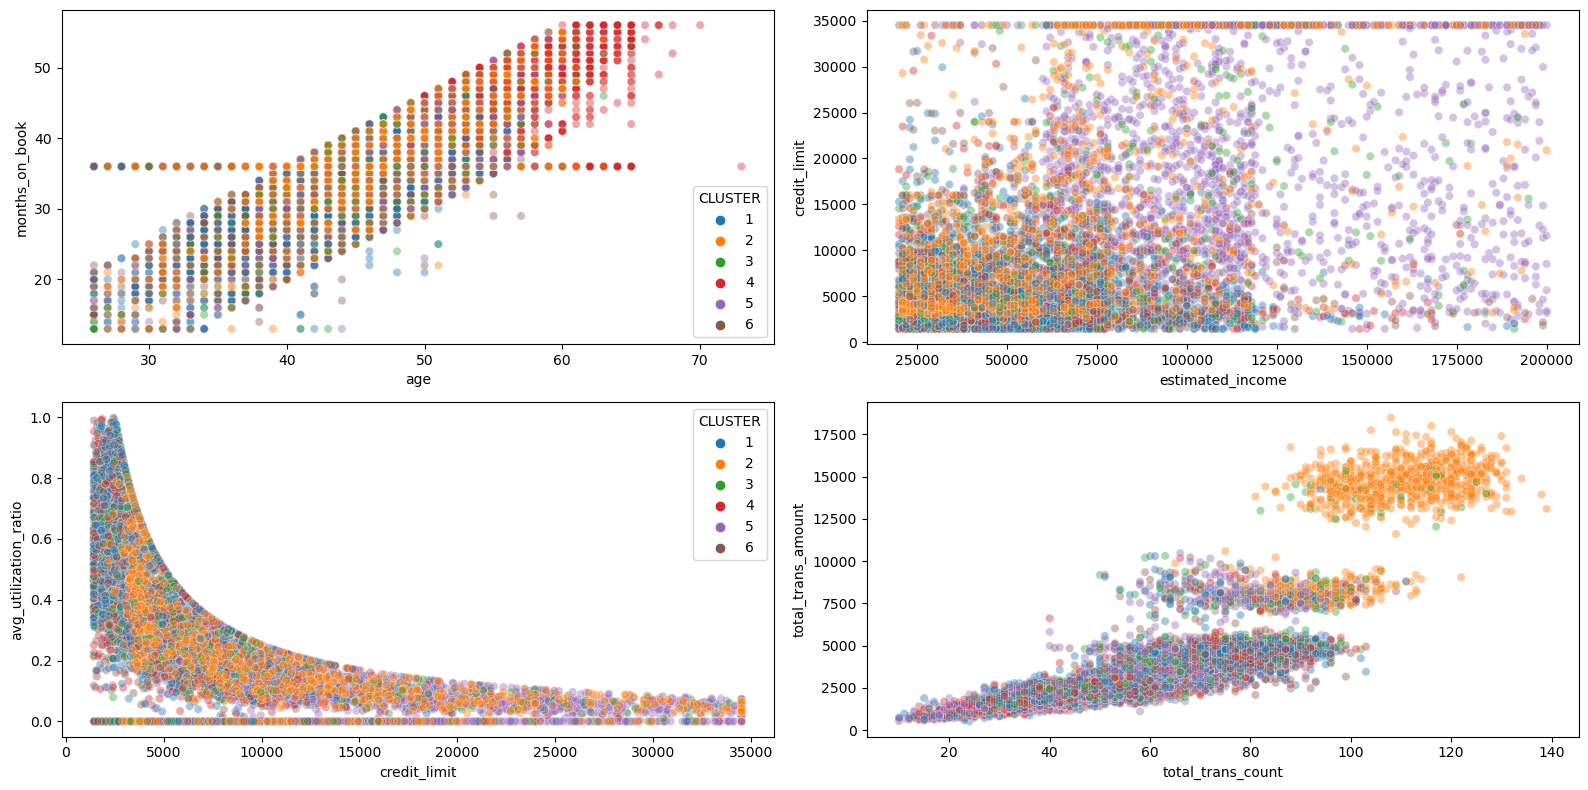

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

We can draw some early conclusions considering only the numeric variables.

For instance, `Cluster 2` has the highest amount of money transitioned, while `Cluster 1` has the lowest credit limit and estimated income and the highest utilization rate. `Cluster 5` has the highest credit limit. Older clients are grouped in `Cluster 4`.

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

In [43]:
categorical_colums=customers.select_dtypes(include=['object'])
categorical_columns

['gender', 'education_level', 'marital_status']

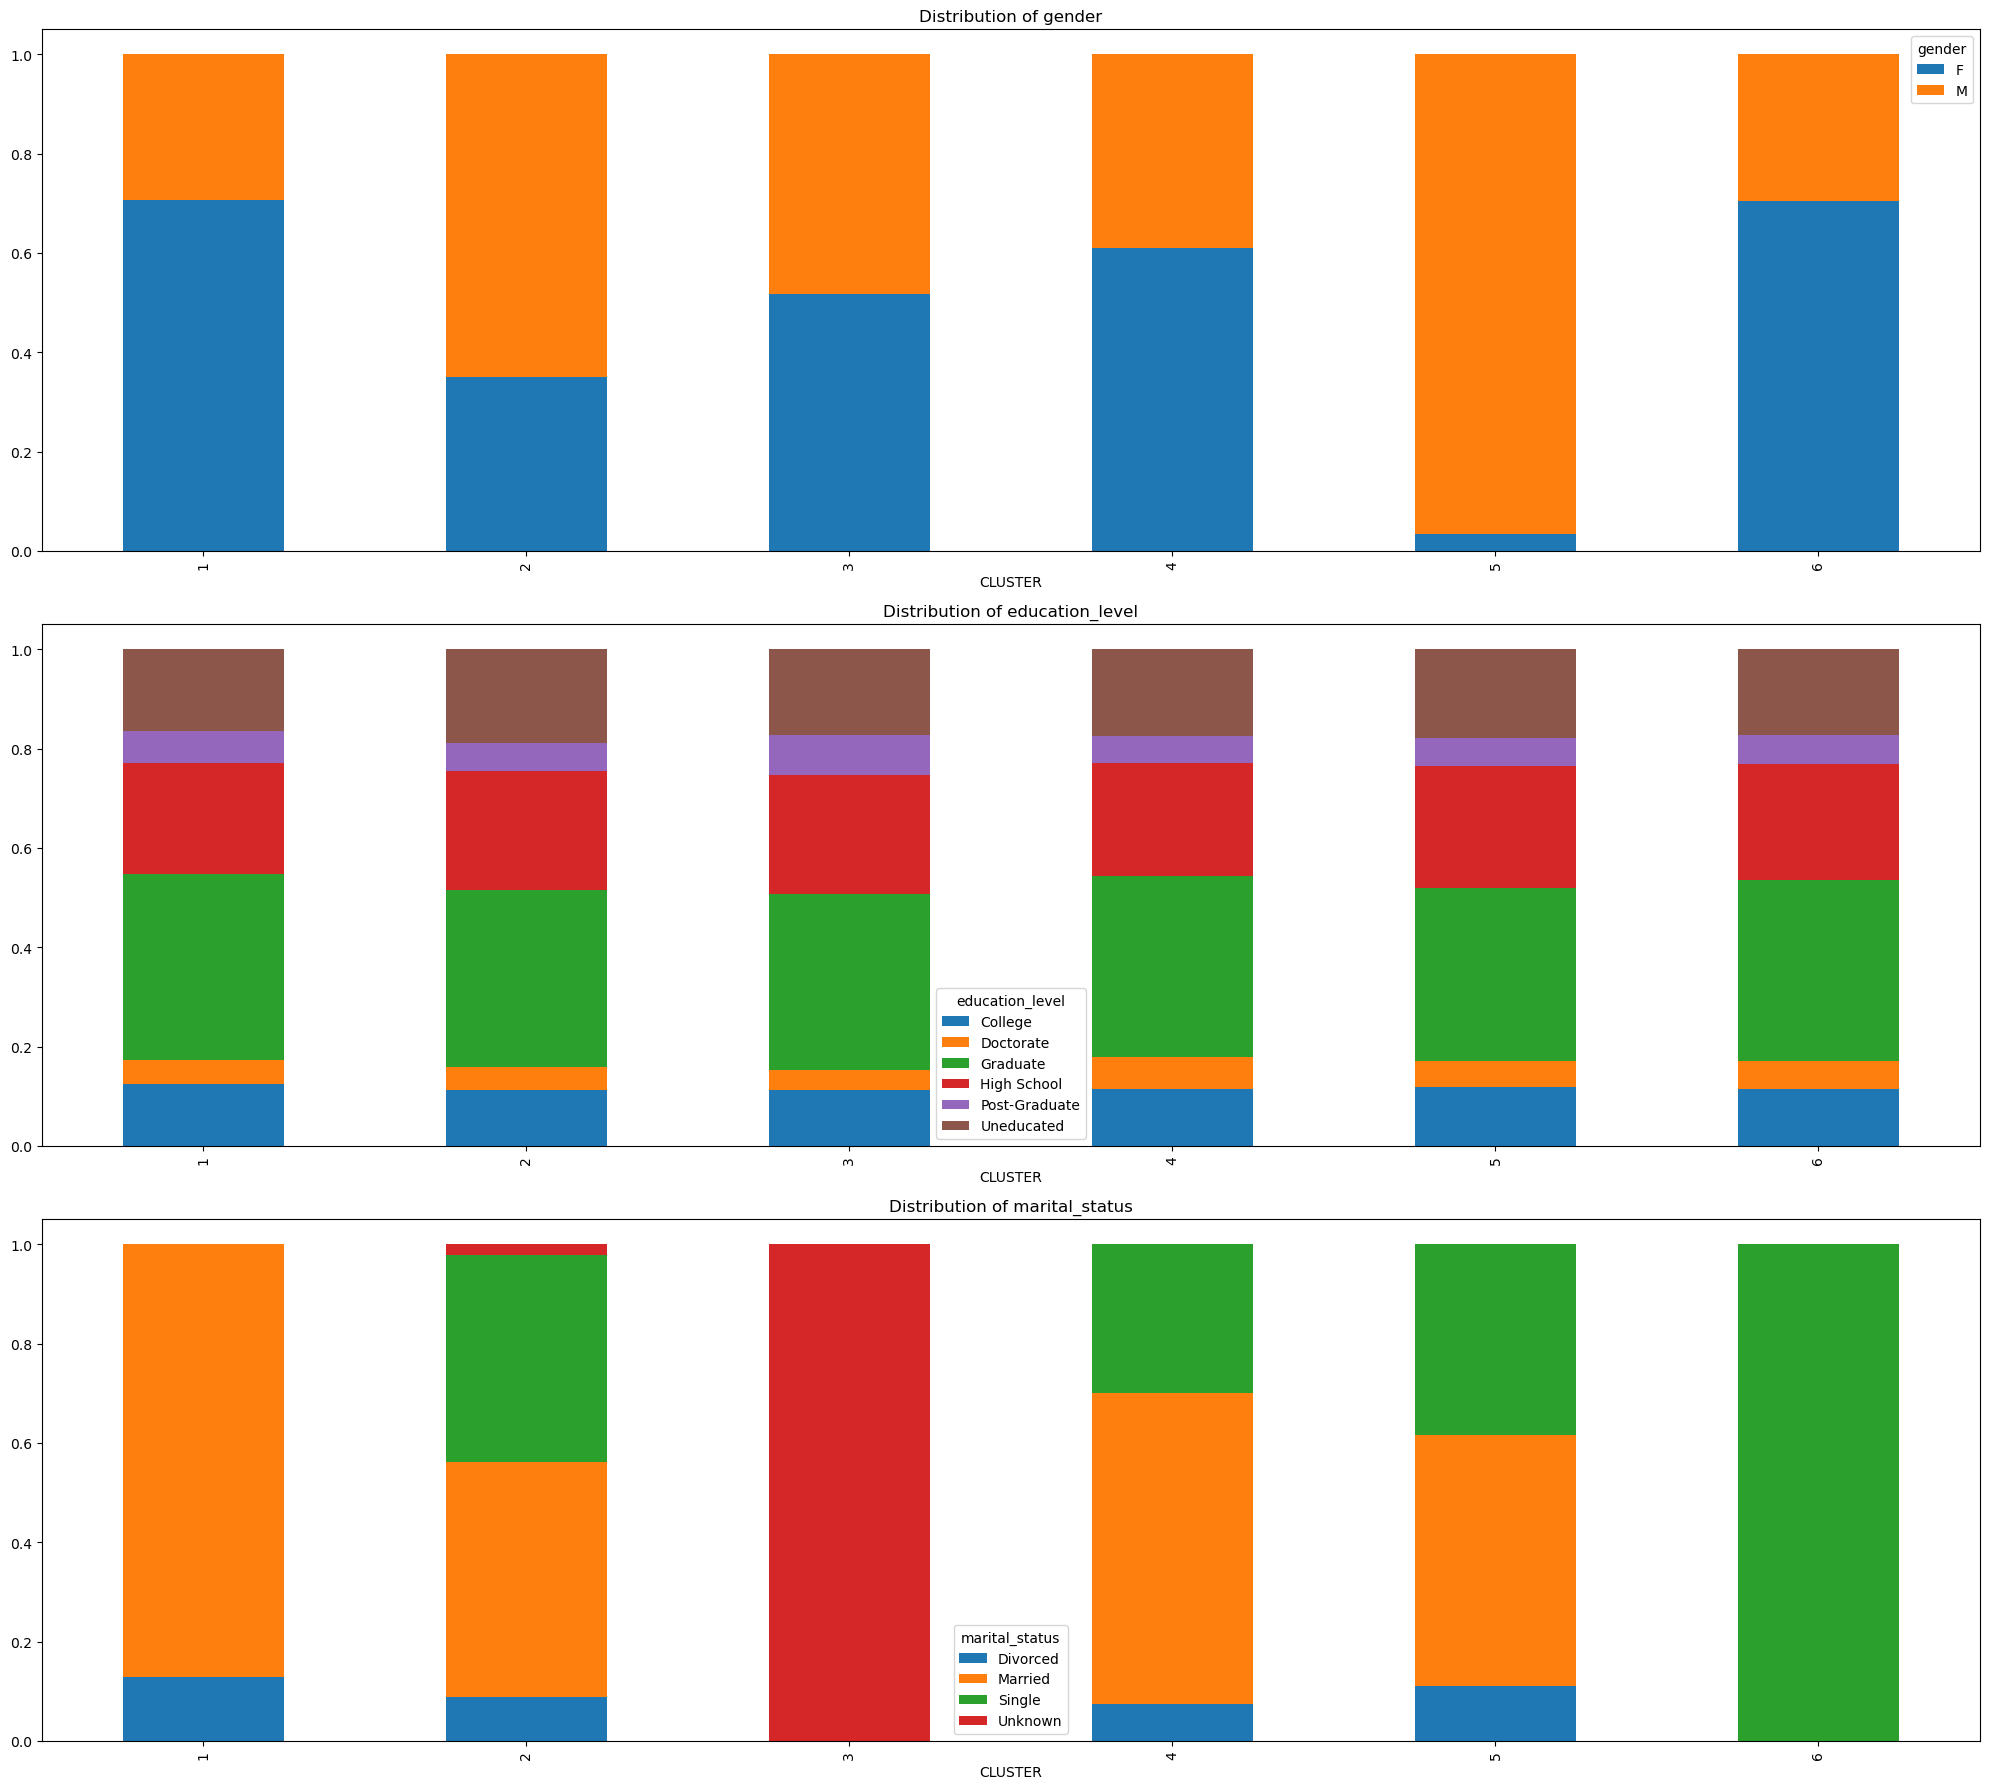

In [86]:
plt.figure(figsize=(20,18))
for i, columns in enumerate(categorical_columns):
    ax=plt.subplot(3,1,i+1)
    plot_df=pd.crosstab(index=customers['CLUSTER'],columns=customers[columns],normalize='index')
    plot_df.plot.bar(stacked=True,ax=ax)
    ax.set_title(f"Distribution of {columns}")
plt.tight_layout()
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters.

In other highlights, `Cluster 1` is composed almost entirely of married people, while we don't know the marital status of anybody in `Cluster 3`. `Cluster 5` is almost completely male and `Cluster 6` is 100% made of single people.

# Conclusion

As demanded by the company, we now have listed the most important characteristics of each cluster. We could also some suggestions and insights into each one of them.

In the end, we have the list of customers with a cluster assigned to each one.

# Cluster 1

<b>Characteristics</b>: Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

<b>Insight</b>: Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases

# Cluster 2

<b>Characteristics</b>: Mostly men; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

<b>Insight</b>: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

# Cluster 3
<b>Characteristics</b>: Gender well divided; low credit limit, high utilization rate; marital status 100% unknown; smaller cluster.

<b>Insight</b>: Men and women with low credit limits but do have high balances.

# Cluster 4

<b>Characteristics</b>: Mostly married, high age, low dependent count, long time customers, low credit limit, low amount transitioned, high utilization rate.

<b>Insight</b>: Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

# Cluster 5

<b>Characteristics</b>: Mostly men, mostly single and married, high estimated income, high credit limit; low amount transitioned; low utilization rate.

<b>Insight</b>: People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it.

# Cluster 6

<b>Characteristics</b>: Mostly women; 100% single people, low estimated income, low credit limit, low amount transitioned, high utilization rate.

<b>Insight</b>: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.


In [87]:
# List of customers and clusters
customers[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,5
1,818770008,6
2,713982108,5
3,769911858,3
4,709106358,1
...,...,...
10122,772366833,2
10123,710638233,1
10124,716506083,1
10125,717406983,3
